# Probabiliy Distributions and Bayes Theorem

In [110]:
import math
from itertools import combinations 
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

In [ ]:
n = [2,6,7,8,9,3,4,5,2,3,4,5,6,4,5,6,7,8,9,3,5,7,9,1]

## Measures of Central Tendency (Mean - Mode - Median)

In [116]:
def mean(n):
    return sum(n) / len(n)
# Finding the mean with function that we created
print(round(mean(n),2))
# Finding the mean with module
print(np.mean(n))

5.33
5.333333333333333


In [115]:
def mode(n):
    result = dict([(x, n.count(x)) for x in n])
    mode = dict([(x, count) for x, count in result.items() if count == max(result.values())])
    return mode
# Finding the mode with function that we created
print(mode(n))
# Finding the mode with module
print(scipy.stats.mode(n))

{5: 4}
ModeResult(mode=array([5]), count=array([4]))


In [118]:
def median(n):
    n.sort()
    if len(n) % 2 == 0:
        return (n[int(len(n)/2) -1 ] + n[int(len(n) /2 ) ] ) /2
    if len(n) % 2 == 1:
        return n[int(len(n) / 2)]  
# Finding the median with function that we created
print(median(n))
# Finding the median with module
print(np.median(n))

5.0
5.0


## Factorial - Combination - Permutation

In [13]:
def factorial(x):
    if x == 0:
        return 1
    if x > 0:
        result = 1
        for i in range(1, x+1):
            result *= i
        return result

In [18]:
def combination(x,y):
    return factorial(x) / (factorial(y) * factorial(x-y))

In [ ]:
def permutation(x,y):
    return factorial(x) / factorial(x-y)

In [187]:
def expected_value(prob):
    output = 0
    for x, p_x in prob.items():
        output += x * p_x
    return output

def variance(dist):
    e_x = expected_value(dist) 
    sum_e_x2 = 0
    for i,k in dist.items():
        sum_e_x2 += (i**2) * k
    return sum_e_x2 - (e_x)**2   

def std_dev(dist):
    return math.sqrt(variance((dist)))


In [188]:
df_toss_dice = dict([(i, 1/6) for i in range(1,7)])
print('The expected value of tossing a dice is {:.2f}'.format(expected_value(df_toss_dice)))
print('The variance of the tossing a dice is {:.2}'.format(variance(df_toss_dice)))
print('The standard deviation of the tossing a dice {:.2f}'.format(std_dev(df_toss_dice)))

The expected value of tossing a dice is 3.50
The variance of the tossing a dice is 2.9
The standard deviation of the tossing a dice 1.71


## Uniform Distribution

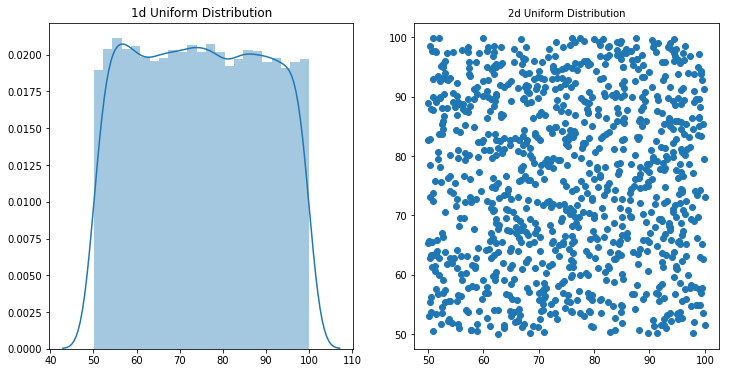

In [171]:
x = np.random.uniform(50,100,1000)
y = np.random.uniform(50,100,1000)
fig, ax = plt.subplots(1,2, figsize = (12,6))
ax[1].scatter(x,y)
sns.distplot(np.random.uniform(50,100,11000), ax = ax[0])
ax[1].set_title('2d Uniform Distribution', fontsize = 10)
ax[0].set_title('1d Uniform Distribution')
plt.show()

## Normal Distribution

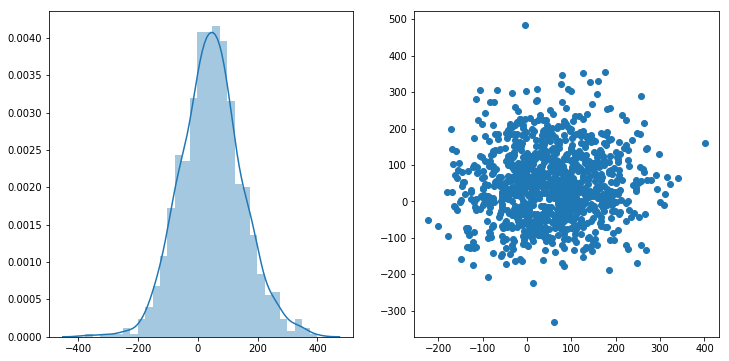

In [175]:
x = np.random.normal(50,100, 1000)
y = np.random.normal(50,100, 1000)
fig, ax = plt.subplots(1,2, figsize = (12,6))
ax[1].scatter(x,y)
sns.distplot(np.random.normal(50,100,1000), ax = ax[0])
plt.show()

## Poisson Distribution

In [233]:
def poisson(lamb,x):
    return (math.exp(-lamb) * (lamb**x) ) / factorial(x)

---Question---

Suppose the average number of lions seen on a 1-day safari is 5. What is the probability that tourists will see fewer than four lions on the next 1-day safari?

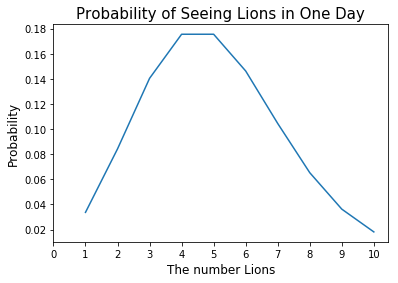

In [234]:
data = np.array([(x,poisson(5, x)) for x in range(1,11)])
plt.plot(data[0:,0], data[0:,1])
plt.xticks(np.arange(0,11))
plt.xlabel("The number Lions", size =12)
plt.ylabel("Probability", size = 12)
plt.title("Probability of Seeing Lions in One Day", size = 15 )
plt.show()

In [236]:
result_lion = poisson(5, 0) + poisson(5, 1) + poisson(5, 2) + poisson(5, 3)
print("The probability of seeing lions fewer than 4 in one day is {:.3f}.".format(result_lion))

The probability of seeing lions fewer than 4 in one day is 0.265.


## Bernoulli Distribution 

In [237]:
def bernoulli(x,p):
    return (p ** x) * ((1-p) ** (1-x))

<Container object of 2 artists>

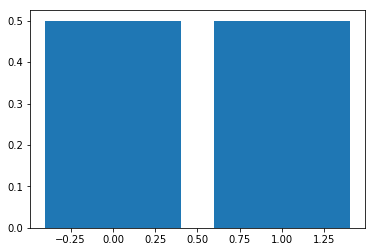

In [238]:
bernoulli_data = {0: bernoulli(0,1/2), 1 : bernoulli(1,1/2)}

plt.bar(x = list(bernoulli_data.keys()),height = list(bernoulli_data.values()))

## Binomial Distribution

In [239]:
def binom(n,x,p):
    return combination(n,x) * (p ** x) * ((1-p) ** (n-x)) 

Which of the following events is most likely? 

A) 1 time 6, when 6 dice are rolled

B) 2 sixes when 12 dice are rolled

C) 3 sixes when 18 dice are rolled

In [195]:
print('A) ---> {:.3f}'.format(binom(6,1,1/6)))
print('B) ---> {:.3f}'.format(binom(12,2,1/6)))
print('C) ---> {:.3f}'.format(binom(18,3,1/6)))

A) ---> 0.402
B) ---> 0.296
C) ---> 0.245


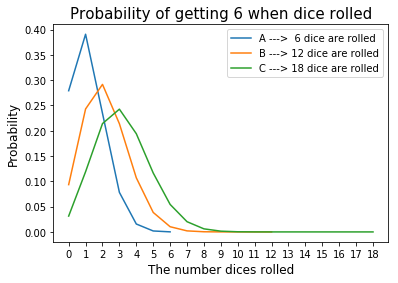

In [232]:
df_a = pd.DataFrame({"random_variable" : np.arange(0,7,1)})
df_a['possibility'] = df_a.random_variable.apply(lambda x: binom(7,x,1/6))
df_b = pd.DataFrame({"random_variable" : np.arange(0,13,1)})
df_b['possibility'] = df_b.random_variable.apply(lambda x: binom(13,x,1/6))
df_c = pd.DataFrame({"random_variable" : np.arange(0,19,1)})
df_c['possibility'] = df_c.random_variable.apply(lambda x: binom(19,x,1/6))
plt.plot(df_a['random_variable'], df_a["possibility"],label ='A --->  6 dice are rolled'  )
plt.plot(df_b['random_variable'], df_b["possibility"], label = "B ---> 12 dice are rolled")
plt.plot(df_c['random_variable'], df_c["possibility"] , label ="C ---> 18 dice are rolled")
plt.xlabel("The number dices rolled", size =12)
plt.ylabel("Probability", size = 12)
plt.title("Probability of getting 6 when dice rolled", size = 15 )
plt.legend()
plt.xticks(np.arange(0,19))
plt.show()

# Bayes

In [91]:
# Bayes
df_confusion_matrix = pd.DataFrame({"Real_Positive" : ["True Positive","False Negative (Type 2 Error)"], 'Real_Negative' : ['False Posivite (Type 1 Error)', "True Negative"]}, index = ['Predicted_Positive', "Predicted_Negative"])

In [100]:
df_confusion_matrix.loc[:,["Real_Positive","Real_Negative"]]

,Real_Positive,Real_Negative
Predicted_Positive,True Positive,False Posivite (Type 1 Error)
Predicted_Negative,False Negative (Type 2 Error),True Negative


##  Zombi Question
(https://brilliant.org/problems/z-virus/#!/solution-comments/)

Precision = (True Positive) / (True Posivite + False Positive)

Recall = (True Positive) / (True Positive + False Negative)

Sensitivity = Recall ------> Both are same. It is the percentage of the people who are not zombie are tested positive

Specificity = (True Negative) / (True Negative + False Positive)   ------> The percentage of people who are not zombie are tested negative

## Question
The world had been harmed by a widespread Z-virus, which already turned 10% of the world's population into zombies.

The scientists then invented a test kit with the sensitivity of 90% and specificity of 70%: 90% of the infected people will be tested positive while 70% of the non-infected will be tested negative.

If the test kit showed a positive result, what would be the probability that the tested subject was truly zombie?

## Solution
P(A) = The possibility of being the zombie (Prevelance = 0.1)

P(B) = The test result is positive (the given information, but we don't know the probability')

---Posterior probability---

P(A/B) = (P(B/A) * P (A)) / P(B)    --------> P(zombie / tested positive)  = (P(tested poitive / zombie) * Prevelance) / P(positive tested)

---Nomalizing Constant---

P(B) = (P(tested positive / zombie) * P(zombie)) + (P(tested positive / not zombie) * P(not zombie))

P(tested positive / zombie) -----> Sensitivity

P(tested positive / not zombie) ------> (1 - Specificity)


In [102]:
def bayes(sensitivity = 0 , specificity = 0, prevelance = 0, situation = "+/+"):
    '''
    Situation : There two possible outcome of this fuction. '+/+' is that if the test result is given as a positive, what is the probabability of the person is truly zombie/sick/cancer/...?
    Situation : There two possible outcome of this fuction. '-/-' is that if the test result is given as a negative, what is the probabability of the person is truly not zombie/not sick/not cancer/...?
    '''
    if situation == "+/+":
        return (sensitivity * prevelance) / ( (sensitivity * prevelance) + ((1 - specificity) * (1- prevelance)))
    
    elif situation == '-/-':
        return (specificity * (1- prevelance)) / ( (specificity * (1- prevelance))  + ((1- sensitivity) * prevelance))

In [103]:
# Result of zombie question
bayes(sensitivity = 0.9, specificity = 0.70, prevelance = 0.1, situation='+/+')

0.24999999999999997

In [180]:
# Zombie question (possibility of the being not zombie if the test result is negative )
bayes(sensitivity = 0.9, specificity = 0.70, prevelance = 0.1, situation='-/-')

0.984375